# Anomaly Analysis

In [1]:
import pandas as pd
import numpy as np
from pylab import *
from matplotlib import pyplot as plt
from scipy.stats import linregress
from scipy.stats.stats import pearsonr

In [2]:
reference_volt_curves= pd.read_pickle("../data/reference/reference_volt_curves.pkl")  

In [3]:
df= pd.read_pickle("../data/processed/with_stat_anomalies.pkl")  

In [4]:
ML_curr= pd.read_pickle("../data/processed/ML_current_with_anomalies.pkl")
ML_volt= pd.read_pickle("../data/processed/ML_voltage_with_anomalies.pkl") 

#### Correlazione tra il numero di outlier in current e voltage

Text(0, 0.5, 'n_voltage_outliers')

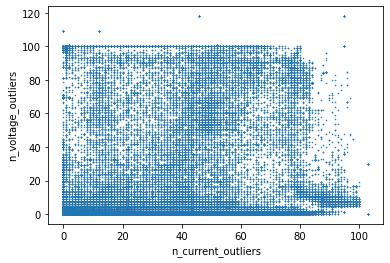

In [5]:
plt.scatter(df["%volt_anomalies"],df["%current_anomalies"],s=0.3)
plt.xlabel("n_current_outliers")
plt.ylabel("n_voltage_outliers")

In [6]:
pearsonr(df["%volt_anomalies"],df["%current_anomalies"])

(0.30729279028817, 0.0)

In [7]:
linregress(df["%volt_anomalies"],df["%current_anomalies"])

LinregressResult(slope=0.3040195637335518, intercept=3.4776699080425457, rvalue=0.30729279028816936, pvalue=0.0, stderr=0.0023832762569636727, intercept_stderr=0.08299302324783728)

Sembrerebbe esserci una moderata correlazione tra le due dimensioni (0.5 circa)

Considerando però che il numero di outlier è già un risultato approssimativo non possiamo affermare con certezze che a numerose anomalie nei valori di tensione corrispondano numerose anomalie nella corrente (o viceversa).

## Analisi anomalie di Voltage

In [8]:
# creazione df con solo le feature che interessano current
df_volt=df.drop(["index","n_current_outliers","%current_anomalies"],axis=1).join(ML_volt[["iForest_volt","LOF_volt","SVM_volt"]])

In [9]:
df_volt[df_volt["voltage_drop"]==True]

VoltageCurve  \
spotName   TimeStamp                                                                
60000_0_00 2019-09-17 21:15:50  [133, 785, 1344, 1729, 1937, 2054, 2129, 2129,...   
           2019-09-18 07:43:57  [136, 757, 1327, 1676, 1897, 1999, 2067, 2135,...   
           2019-09-19 10:33:48  [139, 757, 1314, 1688, 1906, 2063, 2176, 2193,...   
           2019-11-07 12:29:06  [132, 744, 1299, 1663, 1894, 2002, 2068, 2110,...   
           2019-11-08 18:35:01  [139, 749, 1284, 1638, 1844, 1968, 2042, 2099,...   
...                                                                           ...   
60185_0_00 2020-02-24 16:07:57  [145, 809, 1356, 1648, 1816, 1860, 1794, 1736,...   
           2020-02-26 12:59:08  [159, 819, 1363, 1668, 1784, 1850, 1799, 1704,...   
           2020-02-26 15:35:27  [146, 806, 1356, 1657, 1803, 1869, 1825, 1759,...   
           2020-03-03 12:39:10  [145, 819, 1363, 1675, 1828, 1850, 1835, 1784,...   
           2020-03-05 14:57:59  [149, 813, 1363, 1655, 1798, 1820, 1777, 1727,...   

                                                                     CurrentCurve  \
spotName   TimeStamp                                                                
60000_0_00 2019-09-17 21:15:50  [311, 2088, 3740, 4924, 5734, 6327, 6794, 7075...   
           2019-09-18 07:43:57  [310, 2082, 3699, 4849, 5657, 6185, 6621, 7087...   
           2019-09-19 10:33:48  [311, 1932, 3428, 4519, 5329, 6015, 6607, 6919...   
           2019-11-07 12:29:06  [311, 1990, 3577, 4759, 5599, 6190, 6594, 6999...   
           2019-11-08 18:35:01  [311, 1992, 3580, 4732, 5510, 6101, 6631, 7067...   
...                                                                           ...   
60185_0_00 2020-02-24 16:07:57  [318, 2193, 4138, 5553, 6614, 7321, 7640, 7887...   
           2020-02-26 12:59:08  [348, 2233, 4187, 5583, 6560, 7257, 7641, 7781...   
           2020-02-26 15:35:27  [322, 2184, 4046, 5407, 6374, 7054, 7340, 7519...   
           2020-03-03 12:39:10  [328, 2189, 4087, 5511, 6460, 7044, 7445, 7701...   
           2020-03-05 14:57:59  [354, 2231, 4143, 5525, 6481, 7083, 7437, 7685...   

                                voltage_drop  voltage_spike  \
spotName   TimeStamp                                          
60000_0_00 2019-09-17 21:15:50          True          False   
           2019-09-18 07:43:57          True          False   
           2019-09-19 10:33:48          True          False   
           2019-11-07 12:29:06          True          False   
           2019-11-08 18:35:01          True          False   
...                                      ...            ...   
60185_0_00 2020-02-24 16:07:57          True          False   
           2020-02-26 12:59:08          True           True   
           2020-02-26 15:35:27          True          False   
           2020-03-03 12:39:10          True          False   
           2020-03-05 14:57:59          True          False   

                                n_voltage_outliers  %volt_anomalies  \
spotName   TimeStamp                                                  
60000_0_00 2019-09-17 21:15:50                 292               56   
           2019-09-18 07:43:57                 333               64   
           2019-09-19 10:33:48                 321               62   
           2019-11-07 12:29:06                 360               69   
           2019-11-08 18:35:01                 279               54   
...                                            ...              ...   
60185_0_00 2020-02-24 16:07:57                 134               26   
           2020-02-26 12:59:08                  96               24   
           2020-02-26 15:35:27                 289               56   
           2020-03-03 12:39:10                 296               58   
           2020-03-05 14:57:59                 290               56   

                                iForest_volt  LOF_volt  SVM_volt  
spotName   TimeStamp                          

### Plot delle curve per specfico spotname

In [122]:
val_indice=df_volt.loc[['60185_0_00']]
val_indice.columns

Index(['VoltageCurve', 'CurrentCurve', 'voltage_drop', 'voltage_spike',
       'n_voltage_outliers', '%volt_anomalies', 'iForest_volt', 'LOF_volt',
       'SVM_volt'],
      dtype='object')

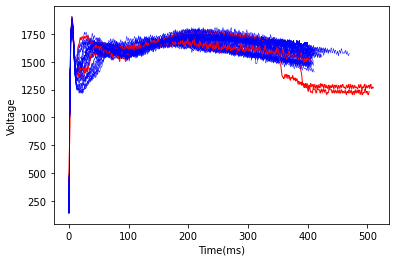

In [123]:
import matplotlib.pyplot as plt
plt.xlabel("Time(ms)")
plt.ylabel("Voltage")
for i in range(50):
    if val_indice["voltage_drop"][i]==False:
        colore="blue"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=0.5)
    else:
        colore="red"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=1)  

## Analisi anomalie di Current

In [ ]:
# creazione df con solo le feature che interessano current
df_curr=df.drop(["index","VoltageCurve","voltage_drop","voltage_spike","n_voltage_outliers","%volt_anomalies"],axis=1).join(ML_curr[["iForest_curr","LOF_curr","SVM_curr"]])
df_curr.head()

CurrentCurve  \
spotName   TimeStamp                                                                
60000_0_00 2019-09-17 17:56:02  [302, 1999, 3574, 4694, 5512, 6148, 6542, 6815...   
           2019-09-17 17:56:07  [303, 2002, 3549, 4702, 5551, 6340, 6886, 7189...   
           2019-09-17 18:05:02  [305, 2017, 3607, 4738, 5656, 6389, 6848, 7154...   
           2019-09-17 18:42:46  [333, 2033, 3641, 4795, 5614, 6312, 6767, 7040...   
           2019-09-17 18:59:36  [302, 1996, 3569, 4719, 5536, 6262, 6837, 7109...   

                                n_current_outliers  %current_anomalies  \
spotName   TimeStamp                                                     
60000_0_00 2019-09-17 17:56:02                  20                   5   
           2019-09-17 17:56:07                   9                   2   
           2019-09-17 18:05:02                   0                   0   
           2019-09-17 18:42:46                   5                   1   
           2019-09-17 18:59:36                  13                   3   

                                iForest_curr  LOF_curr  SVM_curr  
spotName   TimeStamp                                              
60000_0_00 2019-09-17 17:56:02             1         1         1  
           2019-09-17 17:56:07             1         1         1  
           2019-09-17 18:05:02             1         1         1  
           2019-09-17 18:42:46             1         1         1  
           2019-09-17 18:59:36             1         1         1

### Plot delle curve per specfico spotname

In [125]:
val_indice=df_curr.loc[['60185_0_00']]
val_indice.columns

Index(['CurrentCurve', 'n_current_outliers', '%current_anomalies',
       'iForest_curr', 'LOF_curr', 'SVM_curr'],
      dtype='object')

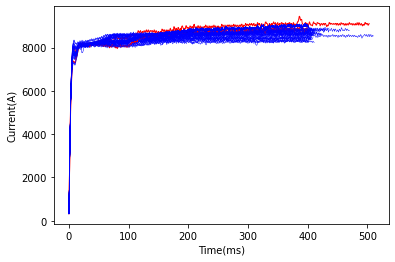

In [126]:
plt.xlabel("Time(ms)")
plt.ylabel("Current(A)")
for i in range(50):
    if val_indice["iForest_curr"][i]==1:
        colore="blue"
        plt.plot(val_indice["CurrentCurve"][i],c=colore,linewidth=0.5)
    else:
        colore="red"
        plt.plot(val_indice["CurrentCurve"][i],c=colore,linewidth=1)
plt.show()